<a href="https://colab.research.google.com/github/Harshanand7/SOC_2024/blob/main/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import imutils
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

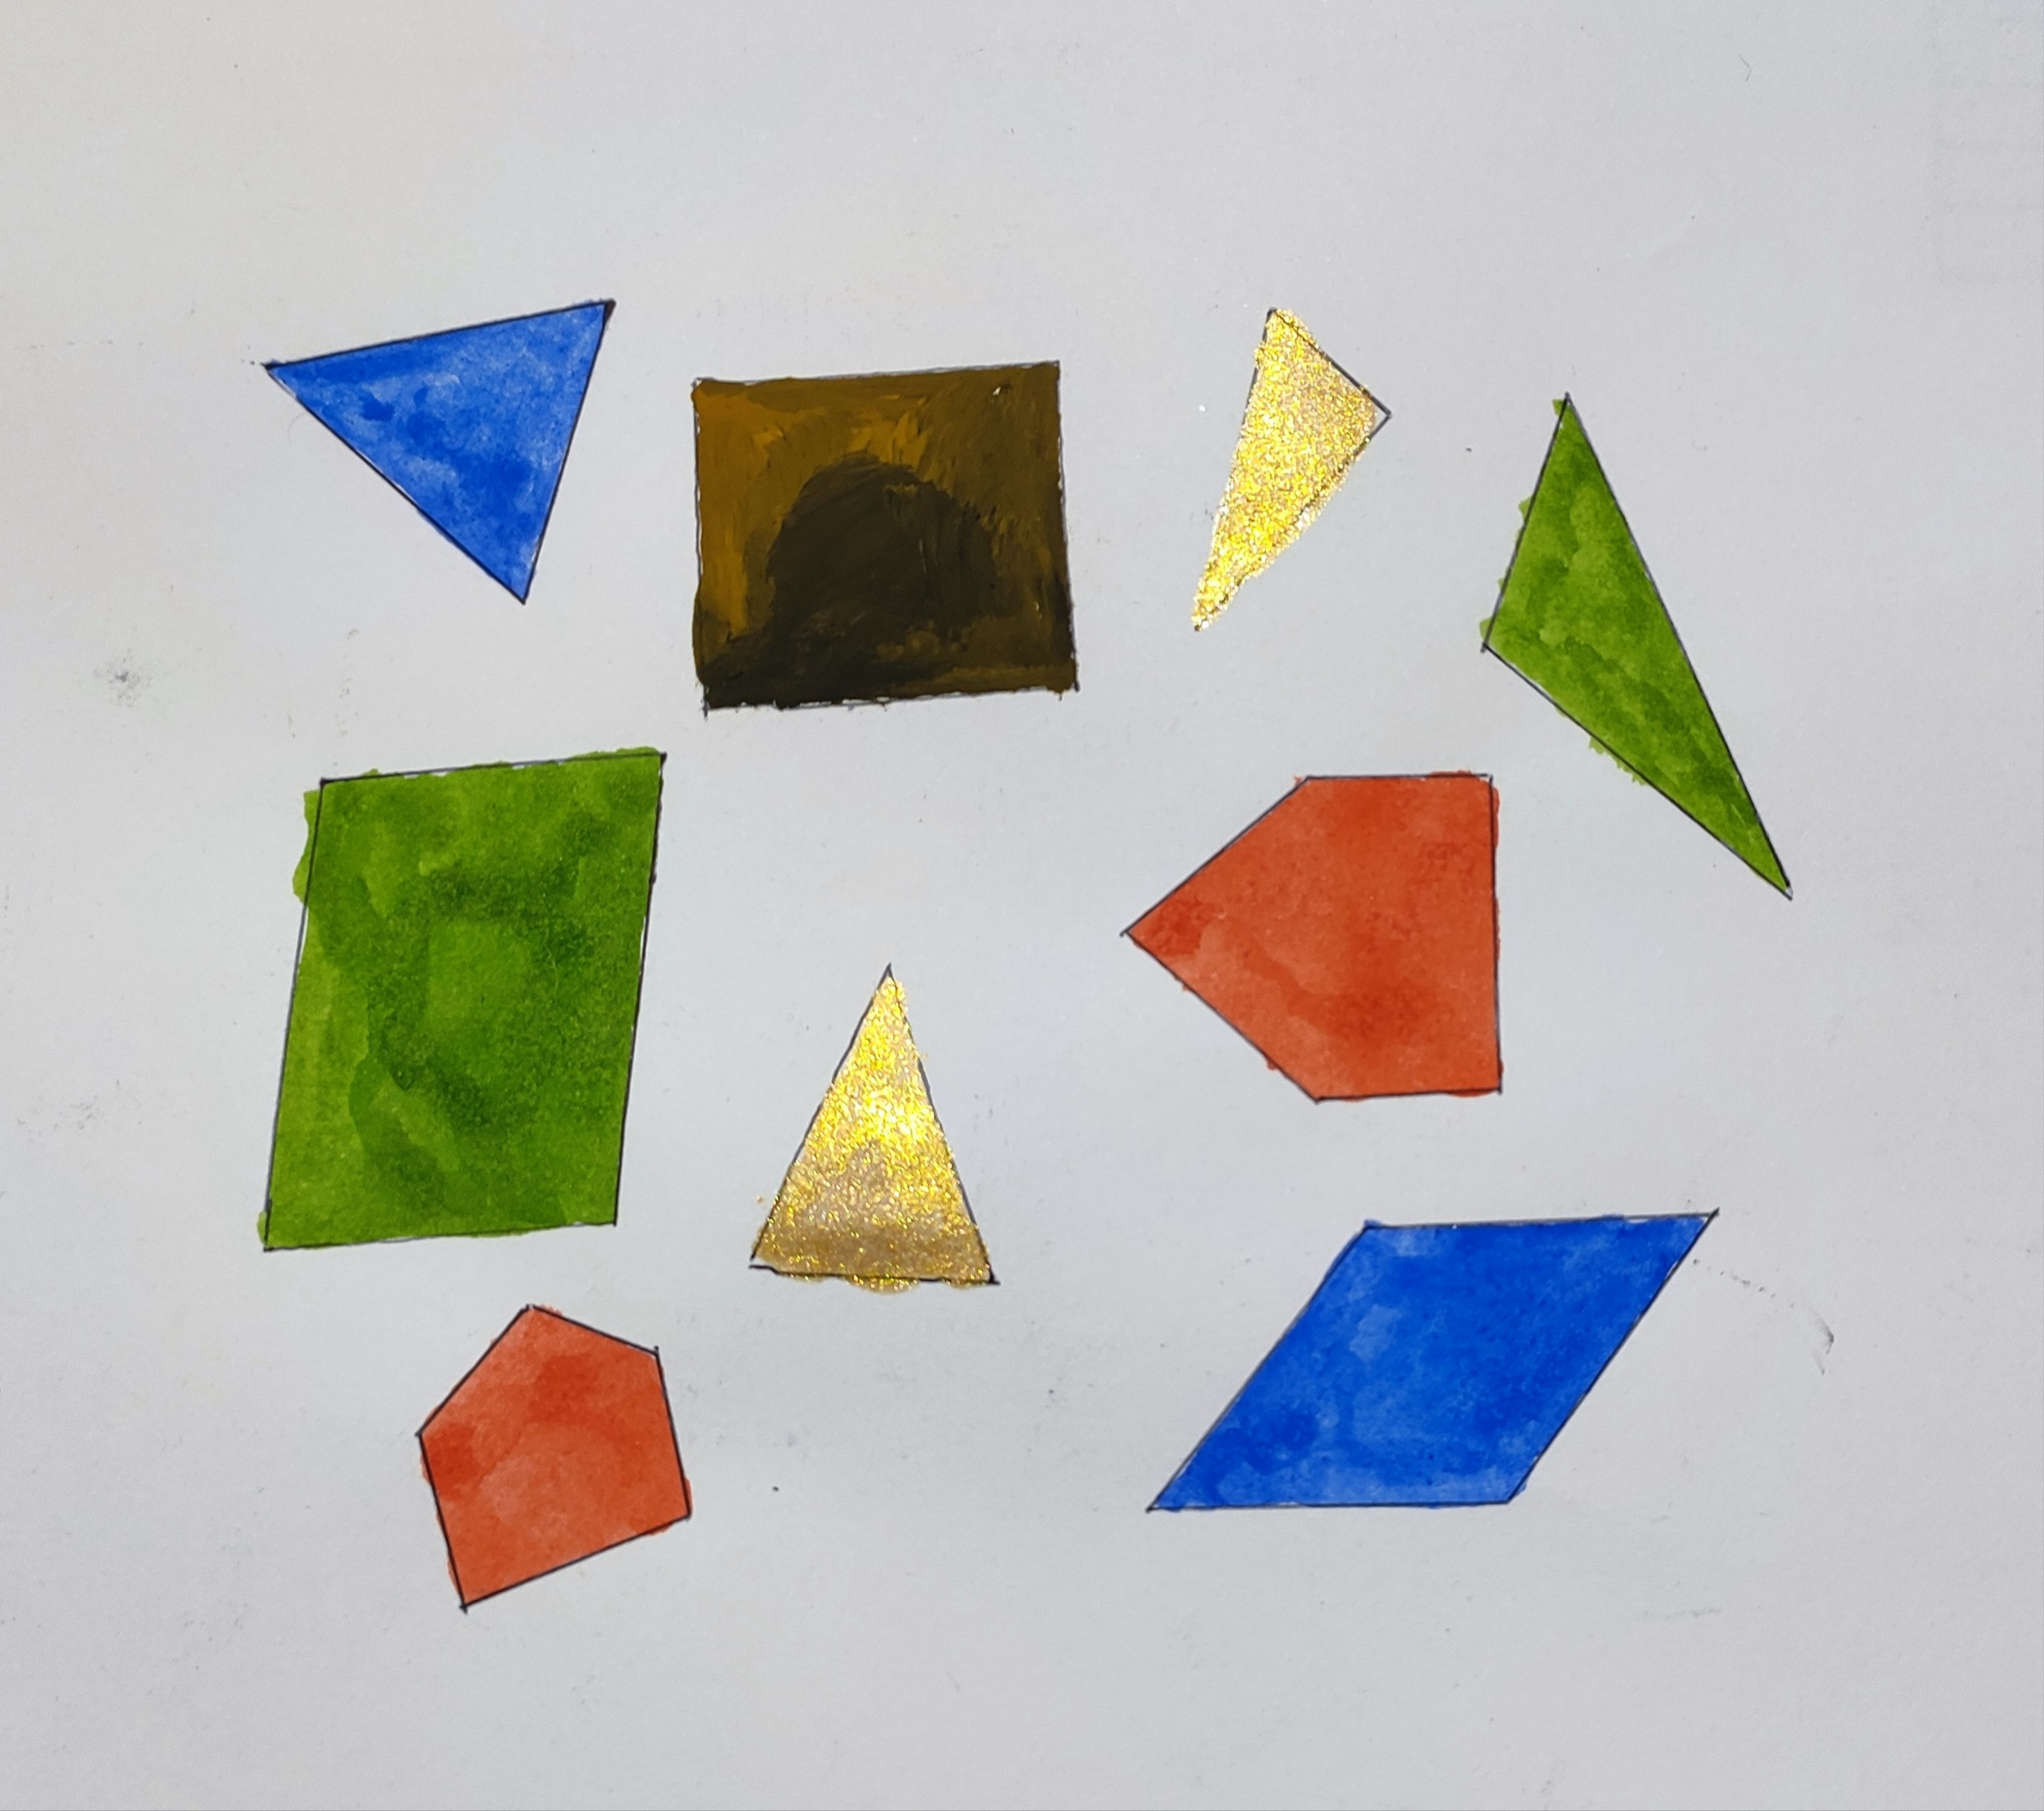

In [2]:
image=cv2.imread('/content/contours.jpg')
cv2_imshow(image)

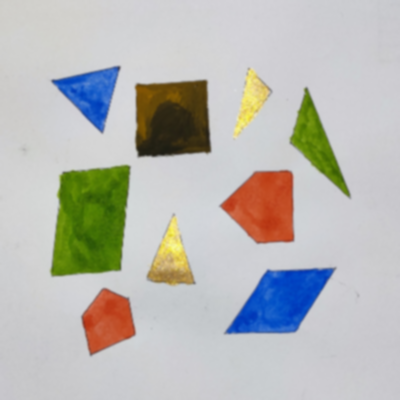

In [26]:
resized=cv2.resize(image,(400,400))
resized=cv2.GaussianBlur(resized,(5,5),0)
cv2_imshow(resized)

##Grayscaling the resized image

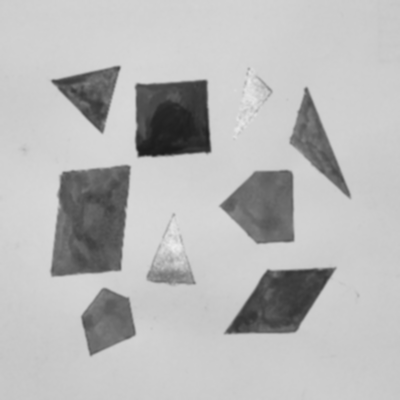

In [27]:
grayscaled=cv2.cvtColor(resized,cv2.COLOR_BGR2GRAY)
cv2_imshow(grayscaled)

##Edge detection

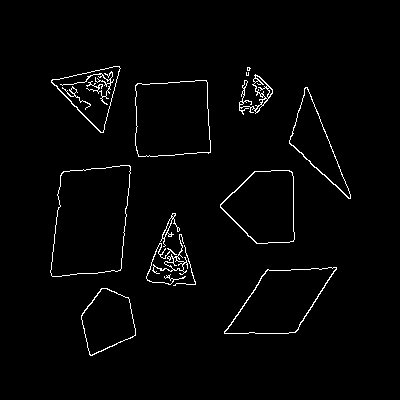

In [36]:
edged=cv2.Canny(grayscaled,10,150)
cv2_imshow(edged)
#using the canny algorithm
#cv2.canny receives 3 arguements image, min threshold and max threshold

##Thresholding

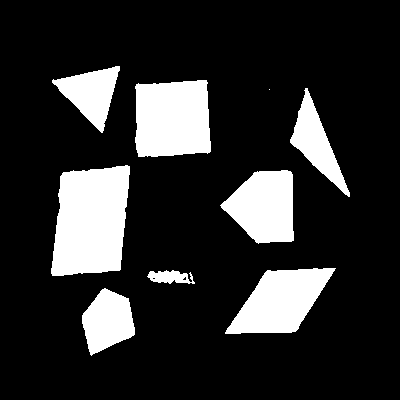

In [55]:
_,thresh=cv2.threshold(grayscaled,145,255,cv2.THRESH_BINARY_INV)
cv2_imshow(thresh)

In [58]:
#Sudden changes in pixel intensity characterize edges.
edges=[]
cnts=cv2.findContours(thresh.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts=imutils.grab_contours(cnts)
for i,contour in enumerate(cnts):
  epsilon=0.02 * cv2.arcLength(contour,True)
  approx=cv2.approxPolyDP(contour,epsilon,True)
  num_edges=len(approx)
  edges.append(num_edges)






In [59]:
edges

[5, 10, 4, 5, 4, 1, 3, 4, 3]

In [69]:
edges=np.array(edges)
unique_count=np.unique(edges)
unique_count

array([ 1,  3,  4,  5, 10])

In [70]:
print("There are 5 polygons of different number of sides")

There are 5 polygons of different number of sides


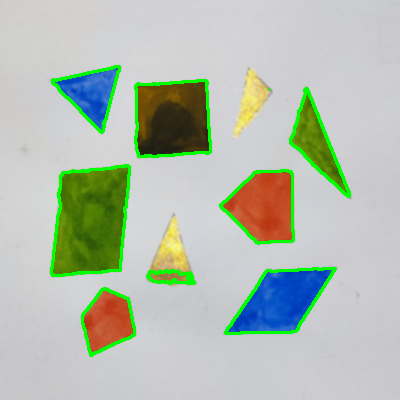

In [62]:
contour_image=resized.copy()
cv2.drawContours(contour_image, cnts, -1, (0, 255, 0), 2)
cv2_imshow(contour_image)